In [48]:
import pandas as pd

# DRY SEASON DATA (WATL24)


# Define file paths
file_path_genes_dry = "/Users/skoog/Desktop/WATL24_metagenomics_viromics/genomad_plasmid_output_files/WATL24_final_contigs_plasmid_genes.tsv"
file_path_summary_dry = "/Users/skoog/Desktop/WATL24_metagenomics_viromics/genomad_plasmid_output_files/WATL24_final_contigs_plasmid_summary_filtered.tsv"

# Load TSV files
genes_dry = pd.read_csv(file_path_genes_dry, sep="\t")
summary_dry = pd.read_csv(file_path_summary_dry, sep="\t")

# Extract contig name from gene ID (everything before last underscore)
genes_dry["seq_name"] = genes_dry["gene"].str.rsplit("_", n=1).str[0]

# Merge gene table with summary info
WATL24_merged_df_dry = pd.merge(
    genes_dry,
    summary_dry,
    on="seq_name",
    how="inner",
    validate="many_to_one" 
)

# Add season info
WATL24_merged_df_dry["season"] = "dry"

# Add conjugation and AMR presence columns
WATL24_merged_df_dry["conjugation"] = WATL24_merged_df_dry["conjugation_genes"].notna().map({True: "yes", False: "no"})
WATL24_merged_df_dry["amr"] = WATL24_merged_df_dry["amr_genes"].notna().map({True: "yes", False: "no"})

# Count unique plasmids
unique_seq_name_count_dry = WATL24_merged_df_dry["seq_name"].nunique()
print(f" Unique plasmids (dry season): {unique_seq_name_count_dry}")

display(WATL24_merged_df_dry)



# WET SEASON DATA (WATL22)

file_path_genes_wet = "/Users/skoog/Desktop/WATL22_metagenomics_viromics/genomad_plasmid_output_files/WATL22_final_contigs_plasmid_genes_brine.tsv"
file_path_summary_wet = "/Users/skoog/Desktop/WATL22_metagenomics_viromics/genomad_plasmid_output_files/WATL22_plasmid_summary_merged_filtered.tsv"

# Load TSVs
genes_wet = pd.read_csv(file_path_genes_wet, sep="\t")
summary_wet = pd.read_csv(file_path_summary_wet, sep="\t")

# Extract contig name from gene ID
genes_wet["seq_name"] = genes_wet["gene"].str.rsplit("_", n=1).str[0]

# Merge genes with summary
WATL22_merged_df_wet = pd.merge(
    genes_wet,
    summary_wet,
    on="seq_name",
    how="inner",
    validate="many_to_one"
)

# Add season info
WATL22_merged_df_wet["season"] = "wet"

# Filter to dereplicated plasmid IDs
plasmid_ids = pd.read_csv(
    "/Users/skoog/Desktop/WATL22_metagenomics_viromics/genomad_plasmid_output_files/plasmid_IDs_filtered_2000_dereplicated.txt",
    header=None,
    names=["seq_name"]
)

WATL22_merged_df_derep_filter_wet = WATL22_merged_df_wet[
    WATL22_merged_df_wet["seq_name"].isin(plasmid_ids["seq_name"])
].copy()

# Add conjugation and AMR presence columns
WATL22_merged_df_derep_filter_wet["conjugation"] = WATL22_merged_df_derep_filter_wet["conjugation_genes"].notna().map({True: "yes", False: "no"})
WATL22_merged_df_derep_filter_wet["amr"] = WATL22_merged_df_derep_filter_wet["amr_genes"].notna().map({True: "yes", False: "no"})

unique_seq_name_count_wet = WATL22_merged_df_derep_filter_wet["seq_name"].nunique()
print(f" Unique plasmids (wet season, dereplicated): {unique_seq_name_count_wet}")

display(WATL22_merged_df_derep_filter_wet)



# COMBINE WET + DRY DATASETS


combined_wet_dry_plasmid_df = pd.concat(
    [WATL22_merged_df_derep_filter_wet, WATL24_merged_df_dry],
    ignore_index=True,
    sort=False
)

print(f"Combined dataset plasmid count: {combined_wet_dry_plasmid_df['seq_name'].nunique()}")
print(combined_wet_dry_plasmid_df["season"].value_counts())

display(combined_wet_dry_plasmid_df)



✅ Unique plasmids (dry season): 12944


,gene,start,end,length_x,strand,gc_content,genetic_code_x,rbs_motif,marker,evalue,...,genetic_code_y,plasmid_score,fdr,n_hallmarks,marker_enrichment,conjugation_genes,amr_genes,season,conjugation,amr
0,k141_1000305_1,47,343,297,-1,0.519,11,NaN,NaN,NaN,...,11,0.8879,NaN,0,1.9021,NaN,NaN,dry,no,no
1,k141_1000305_2,483,2210,1728,-1,0.526,11,NaN,GENOMAD.182784.CP,6.400000e-11,...,11,0.8879,NaN,0,1.9021,NaN,NaN,dry,no,no
2,k141_1000305_3,2278,3714,1437,-1,0.523,11,3Base/5BMM,GENOMAD.147140.PP,3.925000e-106,...,11,0.8879,NaN,0,1.9021,NaN,NaN,dry,no,no
3,k141_1000305_4,3720,4031,312,1,0.631,11,NaN,NaN,NaN,...,11,0.8879,NaN,0,1.9021,NaN,NaN,dry,no,no
4,k141_1000485_1,410,631,222,1,0.577,11,NaN,NaN,NaN,...,11,0.7314,NaN,0,0.0000,NaN,NaN,dry,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75609,k141_999433_3,1641,1880,240,1,0.621,11,NaN,NaN,NaN,...,11,0.8027,NaN,0,0.0000,NaN,NaN,dry,no,no
75610,k141_999797_1,1,1758,1758,1,0.602,11,NaN,GENOMAD.120770.CP,5.578000e-32,...,11,0.7742,NaN,0,0.5819,NaN,NaN,dry,no,no
75611,k141_999797_2,1748,2533,786,1,0.585,11,GGAG/GAGG,NaN,NaN,...,11,0.7742,NaN,0,0.5819,NaN,NaN,dry,no,no
75612,k141_999797_3,2545,3456,912,1,0.616,11,AGGAG,GENOMAD.167172.PC,1.236000e-04,...,11,0.7742,NaN,0,0.5819,NaN,NaN,dry,no,no


✅ Unique plasmids (wet season, dereplicated): 15227


,metagenome_origin_x,gene,start,end,length_x,strand,gc_content,genetic_code_x,rbs_motif,marker,...,genetic_code_y,plasmid_score,fdr,n_hallmarks,marker_enrichment,conjugation_genes,amr_genes,season,conjugation,amr
0,220804_BK_C1_DNA_brine_C_contigs_plasmid_genes...,NODE_7_length_45237_cov_12.687907_1,2,187,186,-1,0.677,11,NaN,NaN,...,11,0.7870,NaN,0,2.3405,NaN,NF033105;NF033105,wet,no,yes
1,220804_BK_C1_DNA_brine_C_contigs_plasmid_genes...,NODE_7_length_45237_cov_12.687907_2,184,978,795,-1,0.662,11,NaN,NaN,...,11,0.7870,NaN,0,2.3405,NaN,NF033105;NF033105,wet,no,yes
2,220804_BK_C1_DNA_brine_C_contigs_plasmid_genes...,NODE_7_length_45237_cov_12.687907_3,1113,1871,759,1,0.684,11,NaN,NaN,...,11,0.7870,NaN,0,2.3405,NaN,NF033105;NF033105,wet,no,yes
3,220804_BK_C1_DNA_brine_C_contigs_plasmid_genes...,NODE_7_length_45237_cov_12.687907_4,1945,3084,1140,1,0.642,11,NaN,NaN,...,11,0.7870,NaN,0,2.3405,NaN,NF033105;NF033105,wet,no,yes
4,220804_BK_C1_DNA_brine_C_contigs_plasmid_genes...,NODE_7_length_45237_cov_12.687907_5,3177,4352,1176,1,0.672,11,NaN,GENOMAD.152069.CP,...,11,0.7870,NaN,0,2.3405,NaN,NF033105;NF033105,wet,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109451,220817_LF_B8_DNA_brine_C_contigs_plasmid_genes...,NODE_6610_length_2424_cov_6.578725_4,1841,2152,312,1,0.583,11,GGA/GAG/AGG,GENOMAD.142672.PC,...,11,0.9672,NaN,1,2.2753,NaN,NaN,wet,no,no
109452,220817_LF_B8_DNA_brine_C_contigs_plasmid_genes...,NODE_6610_length_2424_cov_6.578725_5,2261,2422,162,-1,0.599,11,NaN,NaN,...,11,0.9672,NaN,1,2.2753,NaN,NaN,wet,no,no
109453,220817_LF_B8_DNA_brine_C_contigs_plasmid_genes...,NODE_8110_length_2062_cov_13.169905_1,1,660,660,1,0.644,11,NaN,NaN,...,11,0.8975,NaN,1,1.5023,NaN,NaN,wet,no,no
109454,220817_LF_B8_DNA_brine_C_contigs_plasmid_genes...,NODE_8110_length_2062_cov_13.169905_2,719,1846,1128,1,0.632,11,3Base/5BMM,GENOMAD.107250.PP,...,11,0.8975,NaN,1,1.5023,NaN,NaN,wet,no,no


🌍 Combined dataset plasmid count: 28171
season
wet    93122
dry    75614
Name: count, dtype: int64


,metagenome_origin_x,gene,start,end,length_x,strand,gc_content,genetic_code_x,rbs_motif,marker,...,genetic_code_y,plasmid_score,fdr,n_hallmarks,marker_enrichment,conjugation_genes,amr_genes,season,conjugation,amr
0,220804_BK_C1_DNA_brine_C_contigs_plasmid_genes...,NODE_7_length_45237_cov_12.687907_1,2,187,186,-1,0.677,11,NaN,NaN,...,11,0.7870,NaN,0,2.3405,NaN,NF033105;NF033105,wet,no,yes
1,220804_BK_C1_DNA_brine_C_contigs_plasmid_genes...,NODE_7_length_45237_cov_12.687907_2,184,978,795,-1,0.662,11,NaN,NaN,...,11,0.7870,NaN,0,2.3405,NaN,NF033105;NF033105,wet,no,yes
2,220804_BK_C1_DNA_brine_C_contigs_plasmid_genes...,NODE_7_length_45237_cov_12.687907_3,1113,1871,759,1,0.684,11,NaN,NaN,...,11,0.7870,NaN,0,2.3405,NaN,NF033105;NF033105,wet,no,yes
3,220804_BK_C1_DNA_brine_C_contigs_plasmid_genes...,NODE_7_length_45237_cov_12.687907_4,1945,3084,1140,1,0.642,11,NaN,NaN,...,11,0.7870,NaN,0,2.3405,NaN,NF033105;NF033105,wet,no,yes
4,220804_BK_C1_DNA_brine_C_contigs_plasmid_genes...,NODE_7_length_45237_cov_12.687907_5,3177,4352,1176,1,0.672,11,NaN,GENOMAD.152069.CP,...,11,0.7870,NaN,0,2.3405,NaN,NF033105;NF033105,wet,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168731,NaN,k141_999433_3,1641,1880,240,1,0.621,11,NaN,NaN,...,11,0.8027,NaN,0,0.0000,NaN,NaN,dry,no,no
168732,NaN,k141_999797_1,1,1758,1758,1,0.602,11,NaN,GENOMAD.120770.CP,...,11,0.7742,NaN,0,0.5819,NaN,NaN,dry,no,no
168733,NaN,k141_999797_2,1748,2533,786,1,0.585,11,GGAG/GAGG,NaN,...,11,0.7742,NaN,0,0.5819,NaN,NaN,dry,no,no
168734,NaN,k141_999797_3,2545,3456,912,1,0.616,11,AGGAG,GENOMAD.167172.PC,...,11,0.7742,NaN,0,0.5819,NaN,NaN,dry,no,no


In [49]:

# MERGE WITH GENE ANNOTATIONS


classified_genes = pd.read_excel("/Users/skoog/Desktop/osmotic_stressv2.xlsx")
#classified_genes = pd.read_excel("/Users/skoog/Desktop/try_unique_annotation_descriptions_combined_wet_dry_plasmid_df_classified_filled_completev3.xlsx")

# Normalize text for consistent merging
combined_wet_dry_plasmid_df["annotation_description"] = combined_wet_dry_plasmid_df["annotation_description"].astype(str).str.strip().str.lower()
classified_genes["annotation_description"] = classified_genes["annotation_description"].astype(str).str.strip().str.lower()

# Merge
combined_wet_dry_plasmid_df_classified_genes = pd.merge(
    combined_wet_dry_plasmid_df,
    classified_genes,
    on="annotation_description",
    how="left"
)

# show potential missing 
missing = combined_wet_dry_plasmid_df_classified_genes["annotation_description"].isna().sum()
if missing > 0:
    print(f" {missing} annotations had no match in classification file.")
else:
    print(" All annotations matched successfully.")

display(combined_wet_dry_plasmid_df_classified_genes)

# Save final dataframe
output_path = "/Users/skoog/Desktop/combined_wet_dry_plasmid_df_classified_genes_df_final.csv"
combined_wet_dry_plasmid_df_classified_genes.to_csv(output_path, index=False)



✅ All annotations matched successfully.


,metagenome_origin_x,gene,start,end,length_x,strand,gc_content,genetic_code_x,rbs_motif,marker,...,fdr,n_hallmarks,marker_enrichment,conjugation_genes,amr_genes,season,conjugation,amr,Category,Category_2
0,220804_BK_C1_DNA_brine_C_contigs_plasmid_genes...,NODE_7_length_45237_cov_12.687907_1,2,187,186,-1,0.677,11,NaN,NaN,...,NaN,0,2.3405,NaN,NF033105;NF033105,wet,no,yes,NaN,NaN
1,220804_BK_C1_DNA_brine_C_contigs_plasmid_genes...,NODE_7_length_45237_cov_12.687907_2,184,978,795,-1,0.662,11,NaN,NaN,...,NaN,0,2.3405,NaN,NF033105;NF033105,wet,no,yes,NaN,NaN
2,220804_BK_C1_DNA_brine_C_contigs_plasmid_genes...,NODE_7_length_45237_cov_12.687907_3,1113,1871,759,1,0.684,11,NaN,NaN,...,NaN,0,2.3405,NaN,NF033105;NF033105,wet,no,yes,NaN,NaN
3,220804_BK_C1_DNA_brine_C_contigs_plasmid_genes...,NODE_7_length_45237_cov_12.687907_4,1945,3084,1140,1,0.642,11,NaN,NaN,...,NaN,0,2.3405,NaN,NF033105;NF033105,wet,no,yes,NaN,NaN
4,220804_BK_C1_DNA_brine_C_contigs_plasmid_genes...,NODE_7_length_45237_cov_12.687907_5,3177,4352,1176,1,0.672,11,NaN,GENOMAD.152069.CP,...,NaN,0,2.3405,NaN,NF033105;NF033105,wet,no,yes,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168731,NaN,k141_999433_3,1641,1880,240,1,0.621,11,NaN,NaN,...,NaN,0,0.0000,NaN,NaN,dry,no,no,NaN,NaN
168732,NaN,k141_999797_1,1,1758,1758,1,0.602,11,NaN,GENOMAD.120770.CP,...,NaN,0,0.5819,NaN,NaN,dry,no,no,NaN,NaN
168733,NaN,k141_999797_2,1748,2533,786,1,0.585,11,GGAG/GAGG,NaN,...,NaN,0,0.5819,NaN,NaN,dry,no,no,NaN,NaN
168734,NaN,k141_999797_3,2545,3456,912,1,0.616,11,AGGAG,GENOMAD.167172.PC,...,NaN,0,0.5819,NaN,NaN,dry,no,no,NaN,NaN


💾 Saved to: /Users/skoog/Desktop/combined_wet_dry_plasmid_df_classified_genes_df_final.csv


In [50]:
import pandas as pd


# DRY SEASON RPKM

rpkm_path_dry = "/Users/skoog/Desktop/WATL24_metagenomics_viromics/coverm_plasmid_rpkm_all_samples_95.tsv"
plasmid_rpkm_dry = pd.read_csv(rpkm_path_dry, sep="\t")

# Rename first column to 'seq_name'
plasmid_rpkm_dry.rename(columns={plasmid_rpkm_dry.columns[0]: "seq_name"}, inplace=True)

# Add a column indicating season
plasmid_rpkm_dry["season"] = "dry"

print(f" Loaded dry-season plasmid RPKM: {plasmid_rpkm_dry.shape}")
display(plasmid_rpkm_dry.head())



# WET SEASON RPKM

rpkm_path_wet = "/Users/skoog/Desktop/WATL22_metagenomics_viromics/coverm_plasmid_rpkm_all_samples_95.tsv"
plasmid_rpkm_wet = pd.read_csv(rpkm_path_wet, sep="\t")

# Rename first column to 'seq_name'
plasmid_rpkm_wet.rename(columns={plasmid_rpkm_wet.columns[0]: "seq_name"}, inplace=True)

# Add a column indicating season
plasmid_rpkm_wet["season"] = "wet"

print(f" Loaded wet-season plasmid RPKM: {plasmid_rpkm_wet.shape}")
display(plasmid_rpkm_wet.head())



# COMBINE BOTH SEASONS


combined_rpkm_df = pd.concat(
    [plasmid_rpkm_dry, plasmid_rpkm_wet],
    ignore_index=True,
    sort=False
)

print(f" Combined plasmid RPKM dataset: {combined_rpkm_df.shape}")
print(combined_rpkm_df["season"].value_counts())
display(combined_rpkm_df.head())



# SAVING THE COMBINED DATA


output_path = "/Users/skoog/Desktop/combined_wet_dry_plasmid_RPKM.csv"
combined_rpkm_df.to_csv(output_path, index=False)

print(f" Saved combined plasmid RPKM dataset to:\n{output_path}")


✅ Loaded dry-season plasmid RPKM: (12944, 49)


,seq_name,240111_N1_DNA_S12_L002_map_sorted_plasmid RPKM,240111_N1_DNA_S1_L001_map_sorted_plasmid RPKM,240111_N2_VIROME_S26_L001_map_sorted_plasmid RPKM,240111_N2_VIROME_S37_L002_map_sorted_plasmid RPKM,240111_N3A_sed_DNA_S24_L001_map_sorted_plasmid RPKM,240111_N3A_sed_DNA_S35_L002_map_sorted_plasmid RPKM,240111_N3B_DNA_S4_L001_map_sorted_plasmid RPKM,240111_N3B_VIROME_S28_L001_map_sorted_plasmid RPKM,240111_N3_DNA_S14_L002_map_sorted_plasmid RPKM,...,240117_N15_DNA_S17_L001_map_sorted_plasmid RPKM,240117_N15_DNA_S28_L002_map_sorted_plasmid RPKM,240117_N15_VIROME_S52_L002_map_sorted_plasmid RPKM,240119_GW02_VIROME_S42_L001_map_sorted_plasmid RPKM,240119_GW02_VIROME_S54_L002_map_sorted_plasmid RPKM,240119_GW03_DNA_S20_L001_map_sorted_plasmid RPKM,240120_N3C_DNA_S5_L001_map_sorted_plasmid RPKM,240120_N3C_VIROME_1_S38_L002_map_sorted_plasmid RPKM,240120_N3C_VIROME_S27_L001_map_sorted_plasmid RPKM,season
0,k141_3150952,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0,0.0,0.0,0.0,0,0.0,0.0,dry
1,k141_3448215,14.78058,13.943008,0.081339,0.0,0.000000,0.000000,0.0,0.0,11.353285,...,9.252315,9.286754,0,0.0,0.0,0.0,0,0.0,0.0,dry
2,k141_891798,0.00000,0.000000,0.000000,0.0,0.595480,0.599537,0.0,0.0,0.000000,...,0.000000,0.000000,0,0.0,0.0,0.0,0,0.0,0.0,dry
3,k141_2318665,13.87894,12.569097,0.047546,0.0,5.842318,2.941063,0.0,0.0,18.457685,...,16.482640,18.067362,0,0.0,0.0,0.0,0,0.0,0.0,dry
4,k141_3567132,20.47819,21.973888,0.000000,0.0,0.000000,0.000000,0.0,0.0,48.840670,...,14.177173,12.876943,0,0.0,0.0,0.0,0,0.0,0.0,dry


✅ Loaded wet-season plasmid RPKM: (15227, 55)


,seq_name,220804_BK_C1_DNA_brine_C_map_sorted_plasmid RPKM,220805_BK_F1_DNA_brine_map_sorted_plasmid RPKM,220805_BK_F3_DNA_brine_C_map_sorted_plasmid RPKM,220805_MW_S1_DNA_Brine_map_sorted_plasmid RPKM,220805_MW_S2_DNA_Brine_B_map_sorted_plasmid RPKM,220805_MW_S3_DNA_Brine_map_sorted_plasmid RPKM,220805_MW_S4_DNA_Brine_map_sorted_plasmid RPKM,220806_BK_F5_DNA_brine_A_map_sorted_plasmid RPKM,220806_BK_F6D_DNA_brine_map_sorted_plasmid RPKM,...,220814_MW_F9_DNA_Brine_C_map_sorted_plasmid RPKM,220815_LF_B1_DNA_brine_A_map_sorted_plasmid RPKM,220815_LF_B2_DNA_brine_B_map_sorted_plasmid RPKM,220815_LF_B3_DNA_brine_A_map_sorted_plasmid RPKM,220816_LF_B4_DNA_brine_C_map_sorted_plasmid RPKM,220816_LF_B5_DNA_brine_C_map_sorted_plasmid RPKM,220816_LF_B6_DNA_brine_A_map_sorted_plasmid RPKM,220816_LF_B7_DNA_brine_B_map_sorted_plasmid RPKM,220817_LF_B8_DNA_brine_C_map_sorted_plasmid RPKM,season
0,220804_BK_C1_DNA_brine_C_contigs_plasmid.fna|N...,212.39949,0.042963,0.027218,0.050967,4.735643,0.400585,0.039588,0.000000,0.428625,...,0.000000,0.043921,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,wet
1,220804_BK_C1_DNA_brine_C_contigs_plasmid.fna|N...,423.47568,0.487827,0.000000,0.578714,1.666002,1.299574,0.000000,3.466638,10.350252,...,0.033294,4.155880,0.0,3.245671,0.000000,0.09054,0.0,0.0,0.0,wet
2,220804_BK_C1_DNA_brine_C_contigs_plasmid.fna|N...,184.88353,0.000000,0.000000,0.132329,1.655153,0.055718,0.000000,0.570731,0.200315,...,0.000000,2.736816,0.0,1.029359,0.000000,0.00000,0.0,0.0,0.0,wet
3,220804_BK_C1_DNA_brine_C_contigs_plasmid.fna|N...,318.14902,0.000000,0.000000,0.072472,46.230240,0.000000,0.000000,22.192550,38.397240,...,0.000000,0.749434,0.0,0.100222,0.000000,0.00000,0.0,0.0,0.0,wet
4,220804_BK_C1_DNA_brine_C_contigs_plasmid.fna|N...,184.34595,0.115823,0.000000,4.259448,405.917570,1.465623,0.213448,0.000000,0.092442,...,0.023715,0.000000,0.0,0.063337,0.041371,0.00000,0.0,0.0,0.0,wet


🌍 Combined plasmid RPKM dataset: (28171, 102)
season
wet    15227
dry    12944
Name: count, dtype: int64


,seq_name,240111_N1_DNA_S12_L002_map_sorted_plasmid RPKM,240111_N1_DNA_S1_L001_map_sorted_plasmid RPKM,240111_N2_VIROME_S26_L001_map_sorted_plasmid RPKM,240111_N2_VIROME_S37_L002_map_sorted_plasmid RPKM,240111_N3A_sed_DNA_S24_L001_map_sorted_plasmid RPKM,240111_N3A_sed_DNA_S35_L002_map_sorted_plasmid RPKM,240111_N3B_DNA_S4_L001_map_sorted_plasmid RPKM,240111_N3B_VIROME_S28_L001_map_sorted_plasmid RPKM,240111_N3_DNA_S14_L002_map_sorted_plasmid RPKM,...,220813_LF_F9_DNA_Brine_map_sorted_plasmid RPKM,220814_MW_F9_DNA_Brine_C_map_sorted_plasmid RPKM,220815_LF_B1_DNA_brine_A_map_sorted_plasmid RPKM,220815_LF_B2_DNA_brine_B_map_sorted_plasmid RPKM,220815_LF_B3_DNA_brine_A_map_sorted_plasmid RPKM,220816_LF_B4_DNA_brine_C_map_sorted_plasmid RPKM,220816_LF_B5_DNA_brine_C_map_sorted_plasmid RPKM,220816_LF_B6_DNA_brine_A_map_sorted_plasmid RPKM,220816_LF_B7_DNA_brine_B_map_sorted_plasmid RPKM,220817_LF_B8_DNA_brine_C_map_sorted_plasmid RPKM
0,k141_3150952,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,k141_3448215,14.78058,13.943008,0.081339,0.0,0.000000,0.000000,0.0,0.0,11.353285,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,k141_891798,0.00000,0.000000,0.000000,0.0,0.595480,0.599537,0.0,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,k141_2318665,13.87894,12.569097,0.047546,0.0,5.842318,2.941063,0.0,0.0,18.457685,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,k141_3567132,20.47819,21.973888,0.000000,0.0,0.000000,0.000000,0.0,0.0,48.840670,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


💾 Saved combined plasmid RPKM dataset to:
/Users/skoog/Desktop/combined_wet_dry_plasmid_RPKM.csv


In [51]:
import pandas as pd


# LOAD DATASETS

# Combined plasmid RPKM file (wet + dry)
rpkm_path = "/Users/skoog/Desktop/combined_wet_dry_plasmid_RPKM.csv"
combined_rpkm_df = pd.read_csv(rpkm_path)

# Your combined plasmid gene-level annotation dataframe
annotations_path = "/Users/skoog/Desktop/combined_wet_dry_plasmid_df_classified_genes_df_final.csv"
annotations_df = pd.read_csv(annotations_path)

print(f" Loaded RPKM data: {combined_rpkm_df.shape}")
print(f" Loaded annotations (gene-level): {annotations_df.shape}")



✅ Loaded RPKM data: (28171, 102)
✅ Loaded annotations (gene-level): (168736, 38)


/var/folders/cy/8q3xnh8d03z1c1c21dpxp6380000gn/T/ipykernel_70628/2419760686.py:12: DtypeWarning: Columns (0,22) have mixed types. Specify dtype option on import or set low_memory=False.
  annotations_df = pd.read_csv(annotations_path)


In [52]:
import pandas as pd


# LOAD COMBINED RPKM FILE


rpkm_path = "/Users/skoog/Desktop/combined_wet_dry_plasmid_RPKM.csv"

# Automatic delimiter detection (robust)
combined_rpkm_df = pd.read_csv(rpkm_path, sep=None, engine="python")

# Clean up headers
combined_rpkm_df.columns = combined_rpkm_df.columns.astype(str).str.strip()
combined_rpkm_df.rename(columns={combined_rpkm_df.columns[0]: "seq_name"}, inplace=True)

print(f" Loaded RPKM dataframe: {combined_rpkm_df.shape}")
print(" Example raw seq_name values:")
print(combined_rpkm_df['seq_name'].head(5).tolist())



# CLEAN seq_name VALUES

# Remove everything before and including the "|" character
combined_rpkm_df["seq_name"] = combined_rpkm_df["seq_name"].astype(str).str.split("|").str[-1]

print(" Cleaned seq_name values:")
print(combined_rpkm_df["seq_name"].head(5).tolist())




# MAKE LONG FORMAT


# Identify all RPKM columns (everything except seq_name)
rpkm_cols = [c for c in combined_rpkm_df.columns if c != "seq_name"]

melted_rpkm_df = combined_rpkm_df.melt(
    id_vars="seq_name",
    value_vars=rpkm_cols,
    var_name="sample",
    value_name="RPKM"
)

# Clean up sample names
melted_rpkm_df["sample"] = melted_rpkm_df["sample"].str.replace("_map_sorted_plasmid RPKM", "", regex=False)

# Infer season from naming patterns (240... = dry, 220... = wet)
melted_rpkm_df["season"] = melted_rpkm_df["sample"].apply(
    lambda s: "dry" if str(s).startswith("240") else ("wet" if str(s).startswith("220") else None)
)

print(f" Melted RPKM data (long format): {melted_rpkm_df.shape}")
print(" Season counts:", melted_rpkm_df["season"].value_counts(dropna=False).to_dict())
display(melted_rpkm_df)




✅ Loaded RPKM dataframe: (28171, 102)
🔎 Example raw seq_name values:
['k141_3150952', 'k141_3448215', 'k141_891798', 'k141_2318665', 'k141_3567132']
✅ Cleaned seq_name values:
['k141_3150952', 'k141_3448215', 'k141_891798', 'k141_2318665', 'k141_3567132']
✅ Melted RPKM data (long format): (2845271, 4)
🧪 Season counts: {'wet': 1493063, 'dry': 1324037, None: 28171}


,seq_name,sample,RPKM,season
0,k141_3150952,240111_N1_DNA_S12_L002,0.0,dry
1,k141_3448215,240111_N1_DNA_S12_L002,14.78058,dry
2,k141_891798,240111_N1_DNA_S12_L002,0.0,dry
3,k141_2318665,240111_N1_DNA_S12_L002,13.87894,dry
4,k141_3567132,240111_N1_DNA_S12_L002,20.47819,dry
...,...,...,...,...
2845266,NODE_6299_length_2515_cov_5.292683,220817_LF_B8_DNA_brine_C,57.50688,wet
2845267,NODE_6312_length_2510_cov_14.923014,220817_LF_B8_DNA_brine_C,123.52381,wet
2845268,NODE_6321_length_2507_cov_5.332790,220817_LF_B8_DNA_brine_C,58.381298,wet
2845269,NODE_6610_length_2424_cov_6.578725,220817_LF_B8_DNA_brine_C,71.813286,wet


In [53]:

# ADDING GENE-LEVEL ANNOTATIONS

annotations_path = "/Users/skoog/Desktop/combined_wet_dry_plasmid_df_classified_genes_df_final.csv"
annotations_df = pd.read_csv(annotations_path, low_memory=False)
annotations_df.columns = annotations_df.columns.astype(str).str.strip()

# Just in case, ensure no hidden characters in seq_name
annotations_df["seq_name"] = annotations_df["seq_name"].astype(str).str.strip()

print(f" Loaded gene-level annotations: {annotations_df.shape}")
print(" Example annotation seq_name values:")
print(annotations_df["seq_name"].head(5).tolist())



# MERGE 


# Each gene belongs to one plasmid, and each plasmid appears in multiple samples
gene_rpkm_long = pd.merge(
    annotations_df,
    melted_rpkm_df,
    on="seq_name",
    how="left"  # left keeps all genes
)

print(f" Final merged dataframe (genes × samples): {gene_rpkm_long.shape}")
print(" Non-null RPKM entries:", int(gene_rpkm_long['RPKM'].notna().sum()))
display(gene_rpkm_long.head(5))

# Remove duplicate columns created by merge
dup_cols = [c for c in gene_rpkm_long.columns if c.endswith('_y')]
gene_rpkm_long = gene_rpkm_long.drop(columns=dup_cols)

# Optionally, rename clean versions
gene_rpkm_long.columns = [c.replace('_x', '') for c in gene_rpkm_long.columns]


# CLEAN DATAFRAME 


print(f"Before cleaning: {gene_rpkm_long.shape}")

# Drop any rows that got melted from header artifacts like "season"
gene_rpkm_long = gene_rpkm_long[gene_rpkm_long["sample"] != "season"]

# Drop rows where RPKM is NaN or empty
gene_rpkm_long = gene_rpkm_long.dropna(subset=["RPKM"])

# Remove any duplicate column versions (_x and _y)
dup_cols = [c for c in gene_rpkm_long.columns if c.endswith("_y")]
if dup_cols:
    print(f" Removing duplicate columns: {dup_cols}")
    gene_rpkm_long = gene_rpkm_long.drop(columns=dup_cols)

# Rename _x columns to their clean names
gene_rpkm_long.columns = [c.replace("_x", "") for c in gene_rpkm_long.columns]

# Ensure consistent column ordering (seq_name, sample, RPKM, season, then everything else)
preferred_order = (
    ["seq_name", "sample", "RPKM", "season"]
    + [c for c in gene_rpkm_long.columns if c not in ["seq_name", "sample", "RPKM", "season"]]
)
gene_rpkm_long = gene_rpkm_long[preferred_order]

# sanity check
print(f"After cleaning: {gene_rpkm_long.shape}")
print("Season distribution:", gene_rpkm_long["season"].value_counts(dropna=False).to_dict())
print("Example rows after cleanup:")
display(gene_rpkm_long.head(5))


# REMOVE NON-BRINE SAMPLES FROM WET SEASON

# Define condition: keep all dry, and only wet samples where "brine" appears in the sample name
before_rows = gene_rpkm_long.shape[0]

gene_rpkm_long = gene_rpkm_long[
    (gene_rpkm_long["season"] != "wet") |
    (gene_rpkm_long["sample"].str.contains("brine", case=False, na=False))
]

gene_rpkm_long = gene_rpkm_long[
    (gene_rpkm_long["season"] != "dry") |
    (gene_rpkm_long["sample"].str.contains("DNA", case=False, na=False))
]

after_rows = gene_rpkm_long.shape[0]

print(f"Removed {before_rows - after_rows} non-brine wet samples.")
print(f" Final shape after filtering: {gene_rpkm_long.shape}")
print("Season counts after filtering:", gene_rpkm_long["season"].value_counts(dropna=False).to_dict())



# SAVE FINAL DATAFRAME


output_path = "/Users/skoog/Desktop/final_gene_level_RPKM_with_annotations_LONG.csv"
gene_rpkm_long.to_csv(output_path, index=False)


✅ Loaded gene-level annotations: (168736, 38)
🔍 Example annotation seq_name values:
['NODE_7_length_45237_cov_12.687907', 'NODE_7_length_45237_cov_12.687907', 'NODE_7_length_45237_cov_12.687907', 'NODE_7_length_45237_cov_12.687907', 'NODE_7_length_45237_cov_12.687907']
✅ Final merged dataframe (genes × samples): (17042336, 41)
🧪 Non-null RPKM entries: 8658060


,metagenome_origin_x,gene,start,end,length_x,strand,gc_content,genetic_code_x,rbs_motif,marker,...,conjugation_genes,amr_genes,season_x,conjugation,amr,Category,Category_2,sample,RPKM,season_y
0,220804_BK_C1_DNA_brine_C_contigs_plasmid_genes...,NODE_7_length_45237_cov_12.687907_1,2,187,186,-1,0.677,11,NaN,NaN,...,NaN,NF033105;NF033105,wet,no,yes,NaN,NaN,240111_N1_DNA_S12_L002,NaN,dry
1,220804_BK_C1_DNA_brine_C_contigs_plasmid_genes...,NODE_7_length_45237_cov_12.687907_1,2,187,186,-1,0.677,11,NaN,NaN,...,NaN,NF033105;NF033105,wet,no,yes,NaN,NaN,240111_N1_DNA_S1_L001,NaN,dry
2,220804_BK_C1_DNA_brine_C_contigs_plasmid_genes...,NODE_7_length_45237_cov_12.687907_1,2,187,186,-1,0.677,11,NaN,NaN,...,NaN,NF033105;NF033105,wet,no,yes,NaN,NaN,240111_N2_VIROME_S26_L001,NaN,dry
3,220804_BK_C1_DNA_brine_C_contigs_plasmid_genes...,NODE_7_length_45237_cov_12.687907_1,2,187,186,-1,0.677,11,NaN,NaN,...,NaN,NF033105;NF033105,wet,no,yes,NaN,NaN,240111_N2_VIROME_S37_L002,NaN,dry
4,220804_BK_C1_DNA_brine_C_contigs_plasmid_genes...,NODE_7_length_45237_cov_12.687907_1,2,187,186,-1,0.677,11,NaN,NaN,...,NaN,NF033105;NF033105,wet,no,yes,NaN,NaN,240111_N3A_sed_DNA_S24_L001,NaN,dry


Before cleaning: (17042336, 37)
After cleaning: (8489324, 37)
Season distribution: {'wet': 4935466, 'dry': 3553858}
Example rows after cleanup:


,seq_name,sample,RPKM,season,metagenome_origin,gene,start,end,length,strand,...,plasmid_score,fdr,n_hallmarks,marker_enrichment,conjugation_genes,amr_genes,conjugation,amr,Category,Category_2
48,NODE_7_length_45237_cov_12.687907,220804_BK_C1_DNA_brine_C,212.39949,wet,220804_BK_C1_DNA_brine_C_contigs_plasmid_genes...,NODE_7_length_45237_cov_12.687907_1,2,187,186,-1,...,0.787,NaN,0,2.3405,NaN,NF033105;NF033105,no,yes,NaN,NaN
49,NODE_7_length_45237_cov_12.687907,220805_BK_F1_DNA_brine,0.042963,wet,220804_BK_C1_DNA_brine_C_contigs_plasmid_genes...,NODE_7_length_45237_cov_12.687907_1,2,187,186,-1,...,0.787,NaN,0,2.3405,NaN,NF033105;NF033105,no,yes,NaN,NaN
50,NODE_7_length_45237_cov_12.687907,220805_BK_F3_DNA_brine_C,0.027218,wet,220804_BK_C1_DNA_brine_C_contigs_plasmid_genes...,NODE_7_length_45237_cov_12.687907_1,2,187,186,-1,...,0.787,NaN,0,2.3405,NaN,NF033105;NF033105,no,yes,NaN,NaN
51,NODE_7_length_45237_cov_12.687907,220805_MW_S1_DNA_Brine,0.050967,wet,220804_BK_C1_DNA_brine_C_contigs_plasmid_genes...,NODE_7_length_45237_cov_12.687907_1,2,187,186,-1,...,0.787,NaN,0,2.3405,NaN,NF033105;NF033105,no,yes,NaN,NaN
52,NODE_7_length_45237_cov_12.687907,220805_MW_S2_DNA_Brine_B,4.735643,wet,220804_BK_C1_DNA_brine_C_contigs_plasmid_genes...,NODE_7_length_45237_cov_12.687907_1,2,187,186,-1,...,0.787,NaN,0,2.3405,NaN,NF033105;NF033105,no,yes,NaN,NaN


🧹 Removed 1867260 non-brine wet samples.
✅ Final shape after filtering: (6622064, 37)
Season counts after filtering: {'wet': 4656100, 'dry': 1965964}
💾 Saved final dataset:
/Users/skoog/Desktop/final_gene_level_RPKM_with_annotations_LONG.csv


In [54]:
import pandas as pd


# LOAD FILES


# Main gene-level RPKM file
gene_rpkm_path = "/Users/skoog/Desktop/final_gene_level_RPKM_with_annotations_LONG.csv"
gene_rpkm_long = pd.read_csv(gene_rpkm_path)

# Environmental metadata file
metadata_path = "/Users/skoog/Desktop/WATL22_WATL24_merged_salinity_pH_aw.xlsx"
env_metadata = pd.read_excel(metadata_path)

display(env_metadata.head(3))


# MERGE BASED ON SAMPLE


merged_final = pd.merge(
    gene_rpkm_long,
    env_metadata,
    on="sample",
    how="left"  # keep all genes, add matching metadata
)

print(f"Merged final dataset shape: {merged_final.shape}")
print("Columns now include both gene info and environmental variables.")
display(merged_final.head(5))



# SAVE


output_path = "/Users/skoog/Desktop/final_gene_level_RPKM_with_annotations_LONG_with_metadata.csv"
merged_final.to_csv(output_path, index=False)


/var/folders/cy/8q3xnh8d03z1c1c21dpxp6380000gn/T/ipykernel_70628/240739590.py:9: DtypeWarning: Columns (4,12,20,21,22,31,32,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  gene_rpkm_long = pd.read_csv(gene_rpkm_path)


,Lake_name,sample,pH,Aw,Salinity,Sample_Type,Season
0,Anderson Lake,220815_LF_B1_DNA_brine_A,7.58,0.9079,145.0,DNA,Wet
1,Balicup Lake,220816_LF_B5_DNA_brine_C,7.84,0.9328,110.0,DNA,Wet
2,Bullfinch complex East,220806_MW_S6_DNA_Brine,3.65,0.9600,83.0,DNA,Wet


✅ Merged final dataset shape: (6622064, 43)
🔍 Columns now include both gene info and environmental variables.


,seq_name,sample,RPKM,season,metagenome_origin,gene,start,end,length,strand,...,conjugation,amr,Category,Category_2,Lake_name,pH,Aw,Salinity,Sample_Type,Season
0,NODE_7_length_45237_cov_12.687907,220804_BK_C1_DNA_brine_C,212.399490,wet,220804_BK_C1_DNA_brine_C_contigs_plasmid_genes...,NODE_7_length_45237_cov_12.687907_1,2,187,186,-1,...,no,yes,NaN,NaN,Lake Brown,5.590,0.8900,180.0,DNA,Wet
1,NODE_7_length_45237_cov_12.687907,220805_BK_F1_DNA_brine,0.042963,wet,220804_BK_C1_DNA_brine_C_contigs_plasmid_genes...,NODE_7_length_45237_cov_12.687907_1,2,187,186,-1,...,no,yes,NaN,NaN,Yellow Lake,3.103,0.8510,200.0,DNA,Wet
2,NODE_7_length_45237_cov_12.687907,220805_BK_F3_DNA_brine_C,0.027218,wet,220804_BK_C1_DNA_brine_C_contigs_plasmid_genes...,NODE_7_length_45237_cov_12.687907_1,2,187,186,-1,...,no,yes,NaN,NaN,Crusty Lake,3.320,0.7608,290.0,DNA,Wet
3,NODE_7_length_45237_cov_12.687907,220805_MW_S1_DNA_Brine,0.050967,wet,220804_BK_C1_DNA_brine_C_contigs_plasmid_genes...,NODE_7_length_45237_cov_12.687907_1,2,187,186,-1,...,no,yes,NaN,NaN,Lake Campion,3.280,0.7497,330.0,DNA,Wet
4,NODE_7_length_45237_cov_12.687907,220805_MW_S2_DNA_Brine_B,4.735643,wet,220804_BK_C1_DNA_brine_C_contigs_plasmid_genes...,NODE_7_length_45237_cov_12.687907_1,2,187,186,-1,...,no,yes,NaN,NaN,Lake Campion complex South,5.250,0.7524,300.0,DNA,Wet


💾 Final dataset with metadata saved:
/Users/skoog/Desktop/final_gene_level_RPKM_with_annotations_LONG_with_metadata.csv


In [55]:
import pandas as pd
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt


# Load and filter data

df = pd.read_csv("/Users/skoog/Desktop/final_gene_level_RPKM_with_annotations_LONG_with_metadata.csv")

# Keep only DNA samples
df = df[df["Sample_Type"].astype(str).str.strip() == "DNA"].copy()

# Drop rows with missing Category
df = df.dropna(subset=["Category"])


# Average RPKM for wet season lakes with multiple samples

wet = df[df["season"] == "wet"].copy()
wet_avg = (
    wet.groupby(["Lake_name", "annotation_description", "Category", "Category_2"], as_index=False)
    .agg({"RPKM": "mean", "pH": "mean", "Salinity": "mean", "Aw": "mean"})
)
wet_avg["season"] = "wet"

dry = df[df["season"] == "dry"][["Lake_name", "annotation_description", "Category", "Category_2", "RPKM", "pH", "Salinity", "Aw", "season"]].copy()

combined = pd.concat([wet_avg, dry], ignore_index=True)
#display(combined)




/var/folders/cy/8q3xnh8d03z1c1c21dpxp6380000gn/T/ipykernel_70628/1608022965.py:9: DtypeWarning: Columns (4,12,20,21,22,31,32,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/skoog/Desktop/final_gene_level_RPKM_with_annotations_LONG_with_metadata.csv")


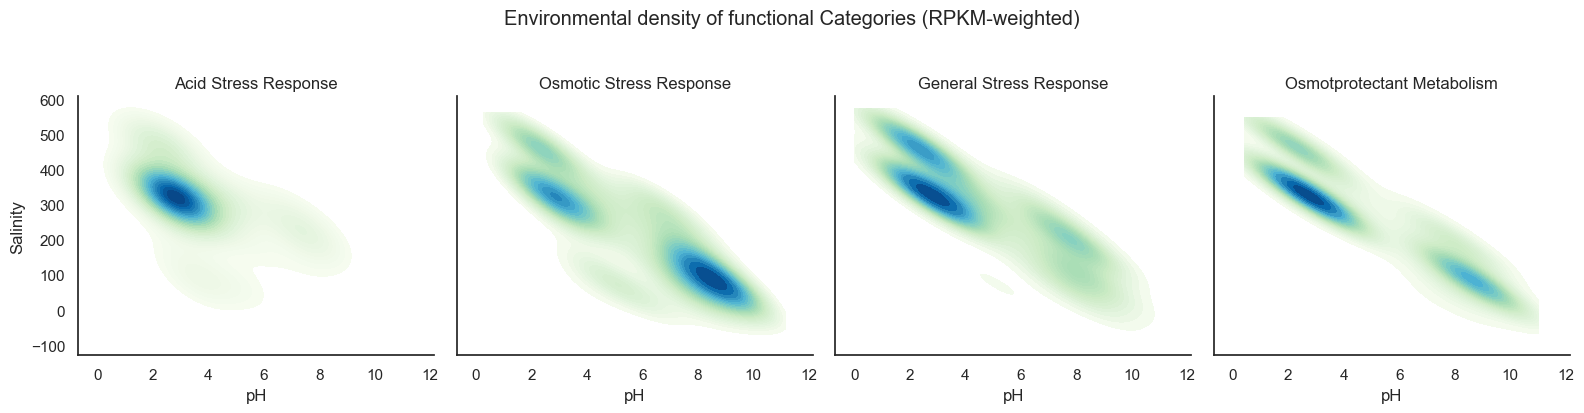

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme(style="white")
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["axes.facecolor"] = "white"


# Keep only valid rows

df_kde = combined.copy()
df_kde = df_kde.dropna(subset=["Category_2", "RPKM", "pH", "Salinity"])


# FacetGrid 

def kde_func(data, **kwargs):
    sns.kdeplot(
        data=data,
        x="pH",
        y="Salinity",
        fill=True,
        levels=30,
        thresh=0.05,
        cmap="GnBu",     
        weights=data["RPKM"],
        **kwargs
    )


# FACET KDE BY Category_2

g = sns.FacetGrid(
    df_kde,
    col="Category_2",
    col_wrap=4,
    height=4,
    sharex=True,
    sharey=True
)

g.map_dataframe(kde_func)

g.set_axis_labels("pH", "Salinity")
g.set_titles("{col_name}")

g.fig.suptitle(
    "Environmental density of functional Categories (RPKM-weighted)",
    y=1.03
)

plt.tight_layout()
plt.show()


Explained variance by 1D env gradient: 0.895726563184356


/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8314 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/var/folders/cy/8q3xnh8d03z1c1c21dpxp6380000gn/T/ipykernel_70628/3430152249.py:196: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 8314 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8314 missing from current font.
  font.set_text(s, 0, flags=flags)


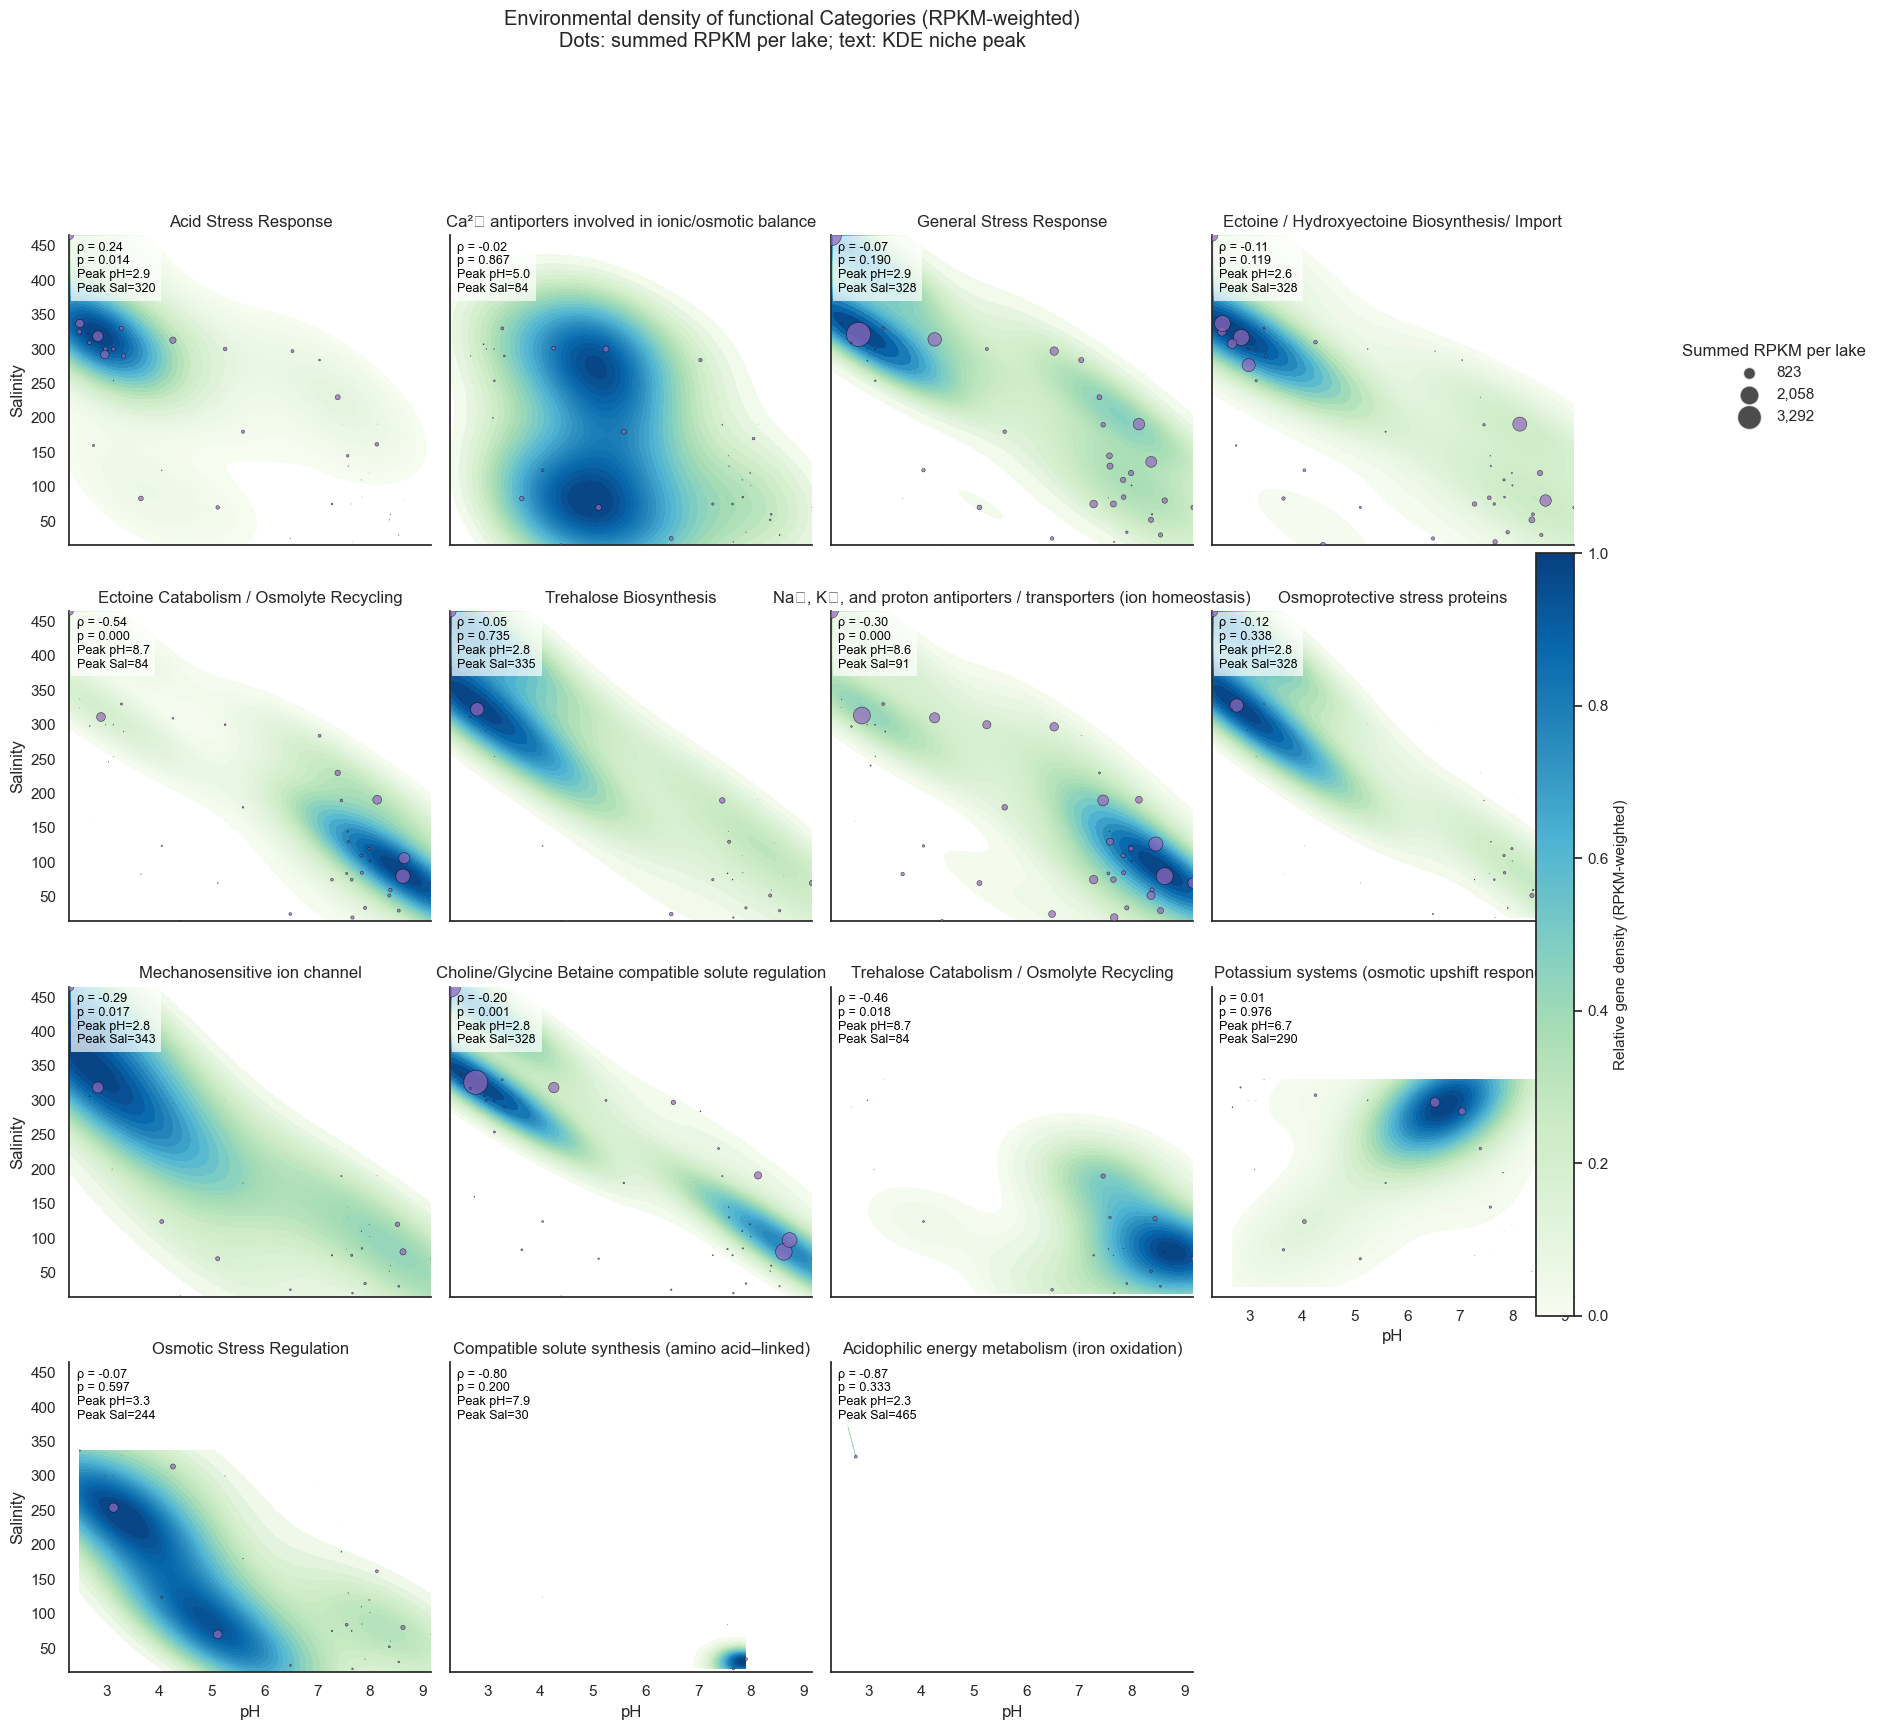

In [57]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import gaussian_kde, spearmanr
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



# Keep only rows with the needed columns
df_kde = combined.dropna(subset=["Category", "pH", "Salinity", "RPKM", "Lake_name"]).copy()
df_kde = df_kde[df_kde["RPKM"] > 0]

# Build pH + Salinity gradient

scaler = StandardScaler()
env_mat = scaler.fit_transform(df_kde[["pH", "Salinity"]])

pca = PCA(n_components=1)
df_kde["EnvGradient"] = pca.fit_transform(env_mat).ravel()

print("Explained variance by 1D env gradient:",
      float(pca.explained_variance_ratio_[0]))

# FUNCTION for KDE-BASED NICHE PH AND SALINITY PEAK 

def compute_kde_peak(data):
    x = data["pH"].values
    y = data["Salinity"].values
    w = data["RPKM"].values

    kde = gaussian_kde(np.vstack([x, y]), weights=w)

    # global grid so peaks are comparable across categories
    gx = np.linspace(df_kde["pH"].min(), df_kde["pH"].max(), 60)
    gy = np.linspace(df_kde["Salinity"].min(), df_kde["Salinity"].max(), 60)
    xx, yy = np.meshgrid(gx, gy)

    zz = kde(np.vstack([xx.ravel(), yy.ravel()])).reshape(xx.shape)

    idx = np.unravel_index(np.argmax(zz), zz.shape)
    return float(xx[idx]), float(yy[idx])   


sns.set_theme(style="white")
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["axes.facecolor"] = "white"

g = sns.FacetGrid(
    df_kde,
    col="Category",       
    col_wrap=4,
    height=4,
    sharex=True,
    sharey=True
)

# Global max for consistent bubble scaling across facets
global_max_rpkm = (
    df_kde
    .groupby(["Category", "Lake_name"])["RPKM"]
    .sum()
    .max()
)

# KDE + BUBBLES + STATS

def kde_with_stats(data, **kwargs):
    ax = plt.gca()

    # KDE BACKGROUND (RPKM-weighted)
    sns.kdeplot(
        data=data,
        x="pH",
        y="Salinity",
        weights=data["RPKM"],
        fill=True,
        levels=30,
        thresh=0.04,
        cmap="GnBu",
        bw_adjust=1.0,
        gridsize=200,
        cut=0,
        ax=ax
    )

    # BUBBLES: SUMMED RPKM PER LAKE
    lake_sum = (
        data
        .groupby("Lake_name", as_index=False)
        .agg({"pH": "mean", "Salinity": "mean", "RPKM": "sum"})
        .rename(columns={"RPKM": "RPKM_sum"})
    )
    lake_sum["size"] = lake_sum["RPKM_sum"] / global_max_rpkm * 300

    ax.scatter(
        lake_sum["pH"],
        lake_sum["Salinity"],
        s=lake_sum["size"],
        color="#9467BD",
        alpha=0.7,
        edgecolor="black",
        linewidths=0.4,
        zorder=5
    )

    # ---------- STATS ANALYSIS (PER CATEGORY) ----------
    # 1) Spearman correlation of RPKM vs environmental gradient
    if data["EnvGradient"].nunique() > 1 and data["RPKM"].nunique() > 1:
        rho, pval = spearmanr(data["RPKM"], data["EnvGradient"])
    else:
        rho, pval = np.nan, np.nan

    # 2) KDE niche peak (pH, Salinity)
    try:
        peak_pH, peak_sal = compute_kde_peak(data)
    except Exception:
        peak_pH, peak_sal = np.nan, np.nan

    
    stat_lines = []
    if not np.isnan(rho):
        stat_lines.append(f"ρ = {rho:.2f}")
    if not np.isnan(pval):
        # show p<0.001, p<0.01, etc if you want fancier formatting later
        stat_lines.append(f"p = {pval:.3f}")
    if not np.isnan(peak_pH) and not np.isnan(peak_sal):
        stat_lines.append(f"Peak pH={peak_pH:.1f}")
        stat_lines.append(f"Peak Sal={peak_sal:.0f}")

    stat_text = "\n".join(stat_lines)

    ax.text(
        0.02, 0.98,
        stat_text,
        transform=ax.transAxes,
        ha="left",
        va="top",
        fontsize=9,
        color="black",
        bbox=dict(facecolor="white", alpha=0.7, edgecolor="none")
    )

# ADD PANELS
g.map_dataframe(kde_with_stats)

g.set_axis_labels("pH", "Salinity")
g.set_titles("{col_name}")

# ADD COLORBAR 

norm = mpl.colors.Normalize(vmin=0, vmax=1)
sm = mpl.cm.ScalarMappable(cmap="GnBu", norm=norm)
sm.set_array([])

cbar = g.fig.colorbar(
    sm,
    ax=g.axes,
    orientation="vertical",
    fraction=0.025,
    pad=0.02
)
cbar.set_label("Relative gene density (RPKM-weighted)", fontsize=11)

# ADD BUBBLE SIZE LEGEND 

legend_vals = np.linspace(global_max_rpkm * 0.25, global_max_rpkm, 3)
legend_sizes = legend_vals / global_max_rpkm * 300

handles = [
    plt.scatter([], [], s=s, color="black", alpha=0.7, edgecolor="white")
    for s in legend_sizes
]
labels = [f"{int(v):,}" for v in legend_vals]

g.fig.legend(
    handles,
    labels,
    title="Summed RPKM per lake",
    loc="upper right",
    bbox_to_anchor=(1.18, 0.88),
    frameon=False
)

# Save

g.fig.suptitle(
    "Environmental density of functional Categories (RPKM-weighted)\n"
    "Dots: summed RPKM per lake; text: KDE niche peak",
    y=1.08
)

plt.tight_layout()
plt.savefig(
    "/Users/skoog/Desktop/KDE_plots_osmotic_acidic_stress_with_stats.svg",
    format="svg",
    dpi=300,
    bbox_inches="tight"
)
plt.show()


df_env shape: (2006, 10)
Unique categories: 15
Skipped (too few points): ['Acidophilic energy metabolism (iron oxidation)', 'Compatible solute synthesis (amino acid–linked)']
D_df shape: (13, 13)


/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8314 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 8314 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8314 missing from current font.
  font.set_text(s, 0, flags=flags)


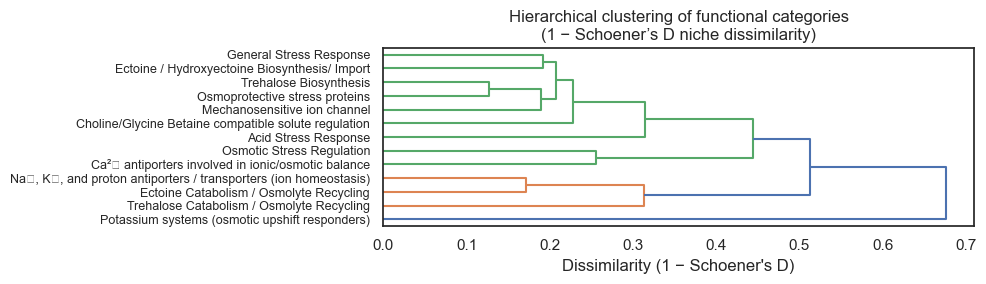

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform


# Build KDE-based Schoener’s D matrix 

def build_D_matrix(df, min_points_for_kde=5, grid_size=80, jitter_frac=1e-3):
    """
    From a long df with Category, pH, Salinity, RPKM,
    build Schoener's D matrix between categories.

    Robust to singular covariance by:
      - requiring min_points_for_kde
      - adding tiny jitter when variance is very low
      - catching LinAlgError and skipping problematic cats

    Returns: D_df (square DataFrame), valid_categories (list)
    """

    # common grid from current df
    pH_min, pH_max = df["pH"].min(), df["pH"].max()
    Sal_min, Sal_max = df["Salinity"].min(), df["Salinity"].max()

    grid_x = np.linspace(pH_min, pH_max, grid_size)
    grid_y = np.linspace(Sal_min, Sal_max, grid_size)
    GX, GY = np.meshgrid(grid_x, grid_y)
    GRID = np.vstack([GX.ravel(), GY.ravel()])   # (2, N)

    kde_surfaces = {}
    valid_categories = []

    skipped_low_points = []
    skipped_singular = []

    for cat in sorted(df["Category"].unique()):
        sub = df[df["Category"] == cat]
        if len(sub) < min_points_for_kde:
            skipped_low_points.append(cat)
            continue

        x = sub["pH"].astype(float).values
        y = sub["Salinity"].astype(float).values
        w = sub["RPKM"].astype(float).values

        data = np.vstack([x, y])  # shape (2, n)

        
        var_x = np.var(x)
        var_y = np.var(y)
        if var_x == 0 or var_y == 0:
            # scale jitter to overall ranges
            jitter_scale_x = jitter_frac * (pH_max - pH_min if pH_max > pH_min else 1.0)
            jitter_scale_y = jitter_frac * (Sal_max - Sal_min if Sal_max > Sal_min else 1.0)
            jitter = rng.normal(
                loc=0.0,
                scale=[jitter_scale_x, jitter_scale_y],
                size=data.shape
            )
            data = data + jitter

        try:
            kde = gaussian_kde(data, weights=w)
            z = kde(GRID)
        except LinAlgError:
            # If covariance matrix is still singular, skip this category
            skipped_singular.append(cat)
            continue

        total = z.sum()
        if total <= 0:
            skipped_singular.append(cat)
            continue

        z = z / total
        kde_surfaces[cat] = z
        valid_categories.append(cat)

    if skipped_low_points:
        print("Skipped (too few points):", skipped_low_points)
    if skipped_singular:
        print("Skipped (singular covariance even after jitter):", skipped_singular)

    if len(valid_categories) < 2:
        return None, []

    # Schoener’s D
    def schoener_D(p, q):
        return 1.0 - 0.5 * np.abs(p - q).sum()

    n = len(valid_categories)
    D_matrix = np.zeros((n, n))

    for i, ci in enumerate(valid_categories):
        for j, cj in enumerate(valid_categories):
            if j < i:
                D_matrix[i, j] = D_matrix[j, i]
            else:
                D_matrix[i, j] = schoener_D(kde_surfaces[ci], kde_surfaces[cj])

    D_df = pd.DataFrame(D_matrix, index=valid_categories, columns=valid_categories)
    return D_df, valid_categories




df_env = (
    df_kde
    .dropna(subset=["Category", "pH", "Salinity", "RPKM", "Lake_name"])
    .copy()
)
df_env = df_env[df_env["RPKM"] > 0]

print("df_env shape:", df_env.shape)
print("Unique categories:", df_env["Category"].nunique())

# Build Schoener's D matrix with function
D_df, categories = build_D_matrix(df_env)

if not categories:
    raise ValueError("Not enough data to compute D matrix.")

print("D_df shape:", D_df.shape)

# HIERARCHICAL CLUSTERING 
dist_matrix = 1 - D_df.values
dist_condensed = squareform(dist_matrix)
Z = linkage(dist_condensed, method="average")

plt.figure(figsize=(10, 3))
dendrogram(
    Z,
    labels=categories,
    orientation="right",
    leaf_font_size=9,
    color_threshold=0.5  # you can tweak this
)
plt.title("Hierarchical clustering of functional categories\n(1 − Schoener’s D niche dissimilarity)")
plt.xlabel("Dissimilarity (1 − Schoener's D)")
plt.tight_layout()
plt.savefig(
    "/Users/skoog/Desktop/niche_dendrogram_from_D2.svg",
    format="svg", dpi=300, bbox_inches="tight"
)
plt.show()


Skipped (too few points): ['Acidophilic energy metabolism (iron oxidation)', 'Compatible solute synthesis (amino acid–linked)']


/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8314 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8314 missing from current font.
  font.set_text(s, 0, flags=flags)


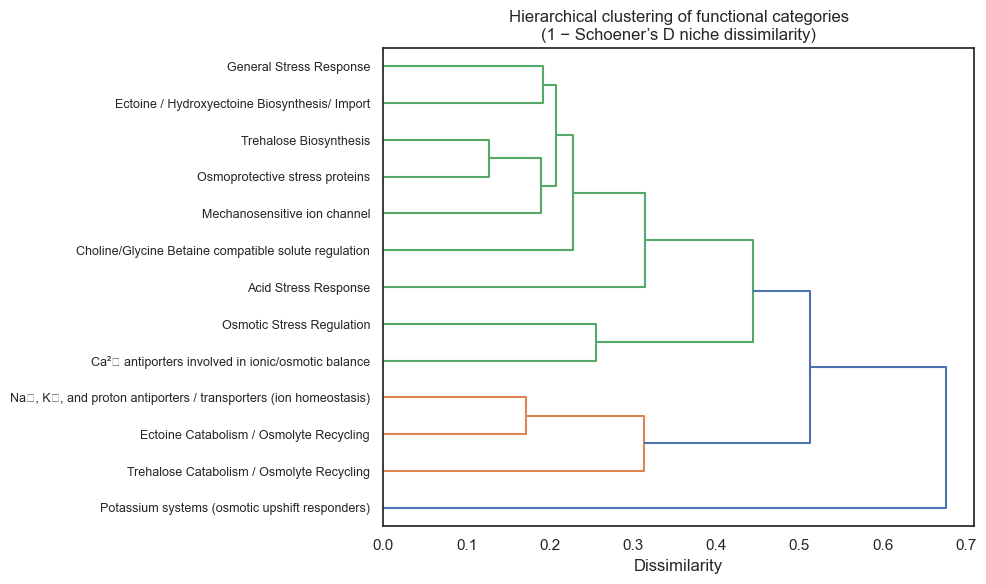

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import gaussian_kde
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
from numpy.linalg import LinAlgError
from functools import lru_cache

# ENVIRONMENTAL DATAFRAME 

rng = np.random.default_rng(42)

df_env = (
    df_kde
    .dropna(subset=["Category", "pH", "Salinity", "RPKM", "Lake_name"])
    .copy()
)
df_env = df_env[df_env["RPKM"] > 0]

#print("df_env shape:", df_env.shape)
#print("Unique categories:", df_env["Category"].nunique())

# Build KDE-based Schoener’s D matrix 

def build_D_matrix(df,
                   min_points_for_kde=5,
                   grid_size=80,
                   jitter_frac=1e-3,
                   random_state=42):
    """
    From a long df with Category, pH, Salinity, RPKM,
    build Schoener's D matrix between categories.

    - Requires at least min_points_for_kde data points per category.
    - Adds small jitter when variance is zero in pH or Salinity
      (this is what fixes gaussian_kde singular covariance issues).
    - Catches singular covariance and skips problematic categories.

    Returns:
        D_df : pd.DataFrame (categories x categories)
        valid_categories : list of category labels with usable KDEs
    """
    rng_local = np.random.default_rng(random_state)

    # common pH–salinity grid from current df
    pH_min, pH_max = df["pH"].min(), df["pH"].max()
    Sal_min, Sal_max = df["Salinity"].min(), df["Salinity"].max()

    grid_x = np.linspace(pH_min, pH_max, grid_size)
    grid_y = np.linspace(Sal_min, Sal_max, grid_size)
    GX, GY = np.meshgrid(grid_x, grid_y)
    GRID = np.vstack([GX.ravel(), GY.ravel()])   # (2, Ngrid)

    kde_surfaces = {}
    valid_categories = []

    skipped_low_points = []
    skipped_singular = []

    for cat in sorted(df["Category"].unique()):
        sub = df[df["Category"] == cat]
        if len(sub) < min_points_for_kde:
            skipped_low_points.append(cat)
            continue

        x = sub["pH"].astype(float).values
        y = sub["Salinity"].astype(float).values
        w = sub["RPKM"].astype(float).values

        
        var_x = np.var(x)
        var_y = np.var(y)

        if var_x == 0 or var_y == 0:
            jitter_scale_x = jitter_frac * (pH_max - pH_min if pH_max > pH_min else 1.0)
            jitter_scale_y = jitter_frac * (Sal_max - Sal_min if Sal_max > Sal_min else 1.0)

            jitter_x = rng_local.normal(
                loc=0.0,
                scale=jitter_scale_x,
                size=x.shape
            )
            jitter_y = rng_local.normal(
                loc=0.0,
                scale=jitter_scale_y,
                size=y.shape
            )

            x = x + jitter_x
            y = y + jitter_y

        data = np.vstack([x, y])  # shape (2, n) after possible jitter

        try:
            kde = gaussian_kde(data, weights=w)
            z = kde(GRID)  # KDE evaluated on grid
        except LinAlgError:
            skipped_singular.append(cat)
            continue

        total = z.sum()
        if total <= 0:
            skipped_singular.append(cat)
            continue

        z = z / total  # normalize to sum=1
        kde_surfaces[cat] = z
        valid_categories.append(cat)

    if skipped_low_points:
        print("Skipped (too few points):", skipped_low_points)
    if skipped_singular:
        print("Skipped (singular covariance even after jitter):", skipped_singular)

    if len(valid_categories) < 2:
        return None, []

    # Schoener's D
    def schoener_D(p, q):
        # p, q already normalized to sum 1
        return 1.0 - 0.5 * np.abs(p - q).sum()

    n = len(valid_categories)
    D_matrix = np.zeros((n, n))

    for i, ci in enumerate(valid_categories):
        for j, cj in enumerate(valid_categories):
            if j < i:
                D_matrix[i, j] = D_matrix[j, i]
            else:
                D_matrix[i, j] = schoener_D(kde_surfaces[ci], kde_surfaces[cj])

    D_df = pd.DataFrame(D_matrix, index=valid_categories, columns=valid_categories)
    return D_df, valid_categories

# ORIGINAL Schoener’s D + DENDROGRAM

D_df, categories = build_D_matrix(df_env)

if not categories:
    raise ValueError("Not enough data to compute D matrix.")

#print("D_df shape:", D_df.shape)

# Distance = 1 - D
dist_matrix = 1 - D_df.values
dist_condensed = squareform(dist_matrix)
Z = linkage(dist_condensed, method="average")

plt.figure(figsize=(10, 6))
dendrogram(
    Z,
    labels=categories,
    orientation="right",
    leaf_font_size=9,
)
plt.title("Hierarchical clustering of functional categories\n(1 − Schoener’s D niche dissimilarity)")
plt.xlabel("Dissimilarity")
plt.tight_layout()
plt.show()



Skipped (too few points): ['Acidophilic energy metabolism (iron oxidation)', 'Compatible solute synthesis (amino acid–linked)']


/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8314 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8314 missing from current font.
  font.set_text(s, 0, flags=flags)


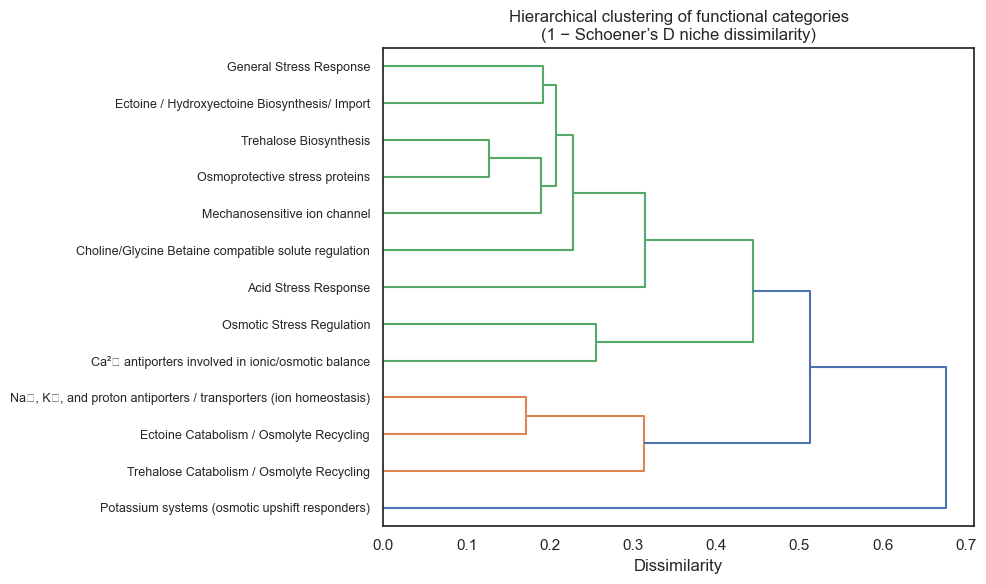

Skipped (too few points): ['Acidophilic energy metabolism (iron oxidation)', 'Compatible solute synthesis (amino acid–linked)']
Skipped (too few points): ['Acidophilic energy metabolism (iron oxidation)']
Skipped (singular covariance even after jitter): ['Compatible solute synthesis (amino acid–linked)']
Skipped (too few points): ['Acidophilic energy metabolism (iron oxidation)']
Skipped (too few points): ['Acidophilic energy metabolism (iron oxidation)']
Skipped (too few points): ['Acidophilic energy metabolism (iron oxidation)', 'Compatible solute synthesis (amino acid–linked)']
Skipped (too few points): ['Acidophilic energy metabolism (iron oxidation)']
Skipped (singular covariance even after jitter): ['Acidophilic energy metabolism (iron oxidation)']
Skipped (too few points): ['Acidophilic energy metabolism (iron oxidation)', 'Compatible solute synthesis (amino acid–linked)']
Skipped (too few points): ['Compatible solute synthesis (amino acid–linked)']
Skipped (too few points): ['A

,Node_ID,Members,Num_members,Bootstrap_support_%
0,24,"Acid Stress Response, Ca²⁺ antiporters involve...",13,100.000000
1,23,"Acid Stress Response, Ca²⁺ antiporters involve...",12,48.543689
2,22,"Acid Stress Response, Ca²⁺ antiporters involve...",9,3.883495
3,21,"Acid Stress Response, Choline/Glycine Betaine ...",7,16.504854
4,18,Choline/Glycine Betaine compatible solute regu...,6,8.737864
5,17,"Ectoine / Hydroxyectoine Biosynthesis/ Import,...",5,2.912621
6,20,"Ectoine Catabolism / Osmolyte Recycling, Na⁺, ...",3,31.067961
7,15,"Mechanosensitive ion channel, Osmoprotective s...",3,3.883495
8,14,"Ectoine Catabolism / Osmolyte Recycling, Na⁺, ...",2,69.902913
9,19,Ca²⁺ antiporters involved in ionic/osmotic bal...,2,55.339806


Acid Stress Response vs Ca²⁺ antiporters involved in ionic/osmotic balance: D=0.502, p=1.000
Acid Stress Response vs Choline/Glycine Betaine compatible solute regulation: D=0.640, p=0.975
Acid Stress Response vs Ectoine / Hydroxyectoine Biosynthesis/ Import: D=0.743, p=0.440
Acid Stress Response vs Ectoine Catabolism / Osmolyte Recycling: D=0.380, p=1.000
Acid Stress Response vs General Stress Response: D=0.667, p=0.965
Acid Stress Response vs Mechanosensitive ion channel: D=0.684, p=0.825
Acid Stress Response vs Na⁺, K⁺, and proton antiporters / transporters (ion homeostasis): D=0.501, p=0.995
Acid Stress Response vs Osmoprotective stress proteins: D=0.689, p=0.745
Acid Stress Response vs Osmotic Stress Regulation: D=0.512, p=0.960
Acid Stress Response vs Potassium systems (osmotic upshift responders): D=0.326, p=1.000
Acid Stress Response vs Trehalose Biosynthesis: D=0.692, p=0.680
Acid Stress Response vs Trehalose Catabolism / Osmolyte Recycling: D=0.207, p=1.000
Ca²⁺ antiporters in

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import gaussian_kde
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
from numpy.linalg import LinAlgError
from functools import lru_cache


rng = np.random.default_rng(42)

df_env = (
    df_kde
    .dropna(subset=["Category", "pH", "Salinity", "RPKM", "Lake_name"])
    .copy()
)
df_env = df_env[df_env["RPKM"] > 0]

#print("df_env shape:", df_env.shape)
#print("Unique categories:", df_env["Category"].nunique())

# Build KDE-based Schoener’s D matrix 

def build_D_matrix(df,
                   min_points_for_kde=5,
                   grid_size=80,
                   jitter_frac=1e-3,
                   random_state=42):
    """
    From a long df with Category, pH, Salinity, RPKM,
    build Schoener's D matrix between categories.

    - Requires at least min_points_for_kde data points per category.
    - Adds small jitter when variance is zero in pH or Salinity
      (this is what fixes gaussian_kde singular covariance issues).
    - Catches singular covariance and skips problematic categories.

    Returns:
        D_df : pd.DataFrame (categories x categories)
        valid_categories : list of category labels with usable KDEs
    """
    rng_local = np.random.default_rng(random_state)

    # common pH–salinity grid from current df
    pH_min, pH_max = df["pH"].min(), df["pH"].max()
    Sal_min, Sal_max = df["Salinity"].min(), df["Salinity"].max()

    grid_x = np.linspace(pH_min, pH_max, grid_size)
    grid_y = np.linspace(Sal_min, Sal_max, grid_size)
    GX, GY = np.meshgrid(grid_x, grid_y)
    GRID = np.vstack([GX.ravel(), GY.ravel()])   # (2, Ngrid)

    kde_surfaces = {}
    valid_categories = []

    skipped_low_points = []
    skipped_singular = []

    for cat in sorted(df["Category"].unique()):
        sub = df[df["Category"] == cat]
        if len(sub) < min_points_for_kde:
            skipped_low_points.append(cat)
            continue

        x = sub["pH"].astype(float).values
        y = sub["Salinity"].astype(float).values
        w = sub["RPKM"].astype(float).values

        # --- jitter fix: handle zero variance per dimension separately ---
        var_x = np.var(x)
        var_y = np.var(y)

        if var_x == 0 or var_y == 0:
            jitter_scale_x = jitter_frac * (pH_max - pH_min if pH_max > pH_min else 1.0)
            jitter_scale_y = jitter_frac * (Sal_max - Sal_min if Sal_max > Sal_min else 1.0)

            jitter_x = rng_local.normal(
                loc=0.0,
                scale=jitter_scale_x,
                size=x.shape
            )
            jitter_y = rng_local.normal(
                loc=0.0,
                scale=jitter_scale_y,
                size=y.shape
            )

            x = x + jitter_x
            y = y + jitter_y

        data = np.vstack([x, y])  # shape (2, n) after possible jitter

        try:
            kde = gaussian_kde(data, weights=w)
            z = kde(GRID)  # KDE evaluated on grid
        except LinAlgError:
            skipped_singular.append(cat)
            continue

        total = z.sum()
        if total <= 0:
            skipped_singular.append(cat)
            continue

        z = z / total  # normalize to sum=1
        kde_surfaces[cat] = z
        valid_categories.append(cat)

    if skipped_low_points:
        print("Skipped (too few points):", skipped_low_points)
    if skipped_singular:
        print("Skipped (singular covariance even after jitter):", skipped_singular)

    if len(valid_categories) < 2:
        return None, []

    # Schoener's D
    def schoener_D(p, q):
        # p, q already normalized to sum 1
        return 1.0 - 0.5 * np.abs(p - q).sum()

    n = len(valid_categories)
    D_matrix = np.zeros((n, n))

    for i, ci in enumerate(valid_categories):
        for j, cj in enumerate(valid_categories):
            if j < i:
                D_matrix[i, j] = D_matrix[j, i]
            else:
                D_matrix[i, j] = schoener_D(kde_surfaces[ci], kde_surfaces[cj])

    D_df = pd.DataFrame(D_matrix, index=valid_categories, columns=valid_categories)
    return D_df, valid_categories

#  Schoener’s D + DENDROGRAM

D_df, categories = build_D_matrix(df_env)

if not categories:
    raise ValueError("Not enough data to compute D matrix.")

#print("D_df shape:", D_df.shape)

# Distance = 1 - D
dist_matrix = 1 - D_df.values
dist_condensed = squareform(dist_matrix)
Z = linkage(dist_condensed, method="average")

plt.figure(figsize=(10, 6))
dendrogram(
    Z,
    labels=categories,
    orientation="right",
    leaf_font_size=9,
)
plt.title("Hierarchical clustering of functional categories\n(1 − Schoener’s D niche dissimilarity)")
plt.xlabel("Dissimilarity")
plt.tight_layout()
plt.show()

# Get leaf sets 

def get_clades_from_linkage(Z, labels):
    """
    Given a linkage matrix Z and corresponding leaf labels,
    return a dict:
        node_index -> frozenset({labels in that clade})

    Node indexing:
      - leaves: 0 .. n-1
      - internal nodes: n .. n+(n-2)  (i.e., n .. 2n-2)
    """
    n_leaves = len(labels)

    @lru_cache(None)
    def _get_leaf_indices(node_id):
        if node_id < n_leaves:
            return [node_id]
        # internal node: look up its two children in Z
        left = int(Z[node_id - n_leaves, 0])
        right = int(Z[node_id - n_leaves, 1])
        return _get_leaf_indices(left) + _get_leaf_indices(right)

    clades = {}
    for node_id in range(n_leaves, n_leaves + Z.shape[0]):
        leaf_idx = _get_leaf_indices(node_id)
        clade_labels = frozenset(labels[i] for i in leaf_idx)
        clades[node_id] = clade_labels

    return clades

# Original clades 
orig_clades = get_clades_from_linkage(Z, categories)
# remove less useful clades with 1 leaf
orig_clades = {
    node_id: clade
    for node_id, clade in orig_clades.items()
    if len(clade) > 1
}
#print(f"Number of internal clades in original tree: {len(orig_clades)}")

# BOOTSTRAP 

def bootstrap_clade_support(df_env,
                            n_boot=200,
                            min_points_for_kde=5,
                            grid_size=80,
                            jitter_frac=1e-3):
    """
    Resample lakes with replacement, rebuild D, rebuild tree,
    and count how often each original clade appears.

    Returns:
        support_counts: dict[frozenset(labels)] -> count
        n_effective_boot: number of replicates that had the full set of categories
        ref_labels, orig_clades_full, Z_full
    """
    lake_ids = df_env["Lake_name"].unique()

    # Build original D + tree to get reference clades
    D_full, cats_full = build_D_matrix(
        df_env,
        min_points_for_kde=min_points_for_kde,
        grid_size=grid_size,
        jitter_frac=jitter_frac,
    )
    if not cats_full:
        raise ValueError("Not enough data for original D matrix.")

    ref_labels = list(D_full.index)
    Z_full = linkage(squareform(1 - D_full.values), method="average")
    orig_clades_full = get_clades_from_linkage(Z_full, ref_labels)
    orig_clades_full = {
        node_id: clade
        for node_id, clade in orig_clades_full.items()
        if len(clade) > 1
    }
    clade_sets = list(orig_clades_full.values())

    support_counts = {clade: 0 for clade in clade_sets}
    n_effective_boot = 0

    for b in range(n_boot):
        # resample lakes with replacement
        boot_lakes = rng.choice(lake_ids, size=len(lake_ids), replace=True)
        boot_df = pd.concat(
            [df_env[df_env["Lake_name"] == L] for L in boot_lakes],
            ignore_index=True
        )

        D_boot, cats_boot = build_D_matrix(
            boot_df,
            min_points_for_kde=min_points_for_kde,
            grid_size=grid_size,
            jitter_frac=jitter_frac,
            random_state=42 + b
        )

        # require same set of categories for a fair comparison
        if (not cats_boot) or (set(cats_boot) != set(ref_labels)):
            continue

        n_effective_boot += 1

        Z_boot = linkage(squareform(1 - D_boot.values), method="average")
        boot_clades = get_clades_from_linkage(Z_boot, list(D_boot.index))
        boot_clade_sets = {
            frozenset(clade) for node, clade in boot_clades.items()
            if len(clade) > 1
        }

        # increment support counts for clades present in this bootstrap tree
        for clade in clade_sets:
            if clade in boot_clade_sets:
                support_counts[clade] += 1

    return support_counts, n_effective_boot, ref_labels, orig_clades_full, Z_full

# BOOTSTRAP 
n_boot = 200  # you can increase to 500–1000 for final analysis
support_counts, n_eff, ref_labels, orig_clades_full, Z_full = bootstrap_clade_support(
    df_env,
    n_boot=n_boot,
    min_points_for_kde=5,
    grid_size=80,
    jitter_frac=1e-3,
)

#print(f"Effective bootstrap replicates (with full category set): {n_eff}")

# Summarize bootstrap support for each clade
rows = []
for node_id, clade in orig_clades_full.items():
    members = sorted(clade)
    count = support_counts.get(clade, 0)
    support = 100.0 * count / n_eff if n_eff > 0 else np.nan
    rows.append({
        "Node_ID": node_id,
        "Members": ", ".join(members),
        "Num_members": len(members),
        "Bootstrap_support_%": support
    })

support_df = (
    pd.DataFrame(rows)
    .sort_values(["Num_members", "Bootstrap_support_%"], ascending=[False, False])
    .reset_index(drop=True)
)

#print("\nBootstrap support for clades (internal nodes):")
display(support_df)

support_df.to_csv(
    "/Users/skoog/Desktop/niche_clade_bootstrap_support.csv",
    index=False
)

# Trying pairwise permutation for Schoener’s D

def schoener_D_from_df(df, catA, catB,
                       min_points_for_kde=5,
                       grid_size=80,
                       jitter_frac=1e-3,
                       random_state=42):
    """
    Compute Schoener’s D between two categories directly
    from the long dataframe using KDE.
    """
    sub = df[df["Category"].isin([catA, catB])].copy()
    D_df_pair, cats_pair = build_D_matrix(
        sub,
        min_points_for_kde=min_points_for_kde,
        grid_size=grid_size,
        jitter_frac=jitter_frac,
        random_state=random_state,
    )
    if D_df_pair is None or len(cats_pair) < 2:
        return np.nan

    if catA not in D_df_pair.index or catB not in D_df_pair.index:
        return np.nan

    return D_df_pair.loc[catA, catB]

def perm_test_schoenerD(df_env,
                        catA,
                        catB,
                        n_perm=200,
                        min_points_for_kde=5,
                        grid_size=80,
                        jitter_frac=1e-3):
    """
    Permutation test for Schoener’s D between catA and catB.
    Null: environmental and abundance patterns of categories are exchangeable.

    Strategy:
      - Keep (pH, Salinity, Lake_name) structure fixed.
      - Shuffle Category labels among rows that belong to catA or catB.
      - Recompute D each time.
    """
    # subset only rows for the two categories
    df_pair = df_env[df_env["Category"].isin([catA, catB])].copy()
    if df_pair["Category"].nunique() < 2:
        return np.nan, np.nan

    # Observed D
    D_obs = schoener_D_from_df(
        df_env,
        catA, catB,
        min_points_for_kde=min_points_for_kde,
        grid_size=grid_size,
        jitter_frac=jitter_frac,
        random_state=123,
    )

    if np.isnan(D_obs):
        return D_obs, np.nan

    D_null = []
    original_categories = df_pair["Category"].values

    for i in range(n_perm):
        shuffled = original_categories.copy()
        rng.shuffle(shuffled)
        df_pair["Category"] = shuffled

        # embed back into a copy of df_env just for these rows
        df_perm = df_env.copy()
        mask = df_perm.index.isin(df_pair.index)
        df_perm.loc[mask, "Category"] = df_pair["Category"].values

        D_perm = schoener_D_from_df(
            df_perm,
            catA, catB,
            min_points_for_kde=min_points_for_kde,
            grid_size=grid_size,
            jitter_frac=jitter_frac,
            random_state=123 + i,
        )
        if not np.isnan(D_perm):
            D_null.append(D_perm)

    D_null = np.array(D_null)
    if len(D_null) == 0:
        return D_obs, np.nan

    # p-value as fraction of null Ds >= observed
    p_value = np.mean(D_null >= D_obs)

    return D_obs, p_value

# Example: run permutation tests for all pairs 
cats = sorted(D_df.index)
results_perm = []
for i, ca in enumerate(cats):
    for j, cb in enumerate(cats):
        if j <= i:
            continue
        D_obs, p_val = perm_test_schoenerD(df_env, ca, cb, n_perm=200)
        results_perm.append({
            "Category_A": ca,
            "Category_B": cb,
            "D_obs": D_obs,
            "p_value": p_val
        })
        print(f"{ca} vs {cb}: D={D_obs:.3f}, p={p_val:.3f}")

perm_df = pd.DataFrame(results_perm)
perm_df.to_csv(
    "/Users/skoog/Desktop/niche_SchoenerD_permutation_tests.csv",
    index=False
)


df_env shape: (2006, 10)
Unique categories: 15
Skipped (too few points): ['Acidophilic energy metabolism (iron oxidation)', 'Compatible solute synthesis (amino acid–linked)']
D_df shape: (13, 13)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning

Silhouette scores by k:
  k=2: silhouette=0.380
  k=3: silhouette=0.364
  k=4: silhouette=0.396
  k=5: silhouette=0.312
  k=6: silhouette=0.277
  k=7: silhouette=0.212

Selected k = 4 (highest silhouette = 0.396)


/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8314 missing from current font.
  font.set_text(s, 0, flags=flags)


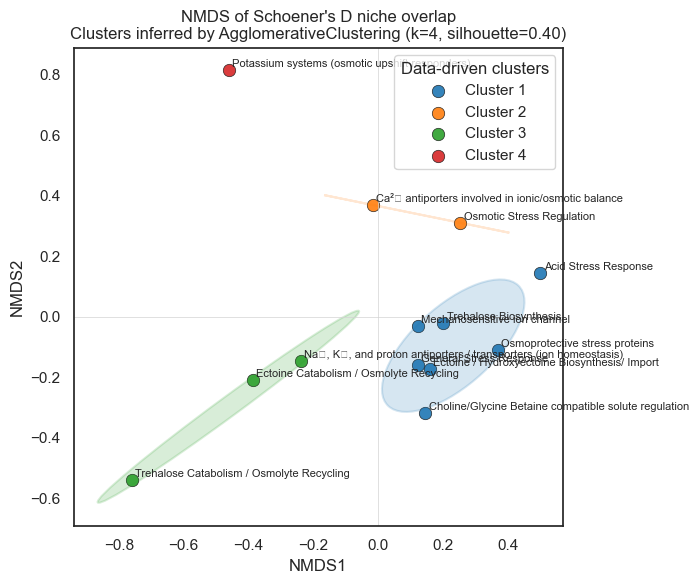

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import gaussian_kde
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import squareform
from numpy.linalg import LinAlgError
from functools import lru_cache

from sklearn.manifold import MDS
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from matplotlib.patches import Ellipse


rng = np.random.default_rng(42)

df_env = (
    df_kde
    .dropna(subset=["Category", "pH", "Salinity", "RPKM", "Lake_name"])
    .copy()
)
df_env = df_env[df_env["RPKM"] > 0]

print("df_env shape:", df_env.shape)
print("Unique categories:", df_env["Category"].nunique())

# Build KDE-based Schoener’s D matrix 

def build_D_matrix(df,
                   min_points_for_kde=5,
                   grid_size=80,
                   jitter_frac=1e-3,
                   random_state=42):
    """
    From a long df with Category, pH, Salinity, RPKM,
    build Schoener's D matrix between categories.

    - Requires at least min_points_for_kde data points per category.
    - Adds small jitter when variance is zero in pH or Salinity
      to avoid gaussian_kde singular covariance issues.
    - Skips problematic categories if KDE still fails.

    Returns:
        D_df : pd.DataFrame (categories x categories, D in [0,1])
        valid_categories : list of category labels
    """
    rng_local = np.random.default_rng(random_state)

    # common pH–salinity grid from current df
    pH_min, pH_max = df["pH"].min(), df["pH"].max()
    Sal_min, Sal_max = df["Salinity"].min(), df["Salinity"].max()

    grid_x = np.linspace(pH_min, pH_max, grid_size)
    grid_y = np.linspace(Sal_min, Sal_max, grid_size)
    GX, GY = np.meshgrid(grid_x, grid_y)
    GRID = np.vstack([GX.ravel(), GY.ravel()])   # (2, Ngrid)

    kde_surfaces = {}
    valid_categories = []

    skipped_low_points = []
    skipped_singular = []

    for cat in sorted(df["Category"].unique()):
        sub = df[df["Category"] == cat]
        if len(sub) < min_points_for_kde:
            skipped_low_points.append(cat)
            continue

        x = sub["pH"].astype(float).values
        y = sub["Salinity"].astype(float).values
        w = sub["RPKM"].astype(float).values

        # --- jitter fix: handle zero variance per dimension separately ---
        var_x = np.var(x)
        var_y = np.var(y)

        if var_x == 0 or var_y == 0:
            jitter_scale_x = jitter_frac * (pH_max - pH_min if pH_max > pH_min else 1.0)
            jitter_scale_y = jitter_frac * (Sal_max - Sal_min if Sal_max > Sal_min else 1.0)

            jitter_x = rng_local.normal(
                loc=0.0,
                scale=jitter_scale_x,
                size=x.shape
            )
            jitter_y = rng_local.normal(
                loc=0.0,
                scale=jitter_scale_y,
                size=y.shape
            )

            x = x + jitter_x
            y = y + jitter_y

        data = np.vstack([x, y])  # shape (2, n) after possible jitter

        try:
            kde = gaussian_kde(data, weights=w)
            z = kde(GRID)  # KDE evaluated on grid
        except LinAlgError:
            skipped_singular.append(cat)
            continue

        total = z.sum()
        if total <= 0:
            skipped_singular.append(cat)
            continue

        z = z / total  # normalize to sum=1
        kde_surfaces[cat] = z
        valid_categories.append(cat)

    if skipped_low_points:
        print("Skipped (too few points):", skipped_low_points)
    if skipped_singular:
        print("Skipped (singular covariance even after jitter):", skipped_singular)

    if len(valid_categories) < 2:
        return None, []

    # Schoener's D
    def schoener_D(p, q):
        # p, q already normalized to sum 1
        return 1.0 - 0.5 * np.abs(p - q).sum()

    n = len(valid_categories)
    D_matrix = np.zeros((n, n))

    for i, ci in enumerate(valid_categories):
        for j, cj in enumerate(valid_categories):
            if j < i:
                D_matrix[i, j] = D_matrix[j, i]
            else:
                D_matrix[i, j] = schoener_D(kde_surfaces[ci], kde_surfaces[cj])

    D_df = pd.DataFrame(D_matrix, index=valid_categories, columns=valid_categories)
    return D_df, valid_categories


D_df, categories = build_D_matrix(df_env)

if not categories:
    raise ValueError("Not enough data to compute D matrix.")

print("D_df shape:", D_df.shape)

# Distance = 1 - D
dist_matrix = 1 - D_df.values

# NMDS ON 1 - D

nmds = MDS(
    n_components=2,
    dissimilarity="precomputed",
    metric=False,
    random_state=42,
    n_init=20,
    max_iter=2000
)

coords = nmds.fit_transform(dist_matrix)  # shape (n_categories, 2)


# STATISTICAL CLUSTERING 

n_cats = len(categories)
candidate_ks = list(range(2, min(8, n_cats)))  # try k=2..up to 7 or n_cats-1

sil_results = []

for k in candidate_ks:
    model = AgglomerativeClustering(
        n_clusters=k,
        affinity="precomputed",
        linkage="average"
    )
    labels_k = model.fit_predict(dist_matrix)
    # silhouette with precomputed distance matrix
    score_k = silhouette_score(dist_matrix, labels_k, metric="precomputed")
    sil_results.append((k, score_k))

# choose k with max silhouette score
best_k, best_sil = max(sil_results, key=lambda x: x[1])
print("Silhouette scores by k:")
for k, s in sil_results:
    print(f"  k={k}: silhouette={s:.3f}")
print(f"\nSelected k = {best_k} (highest silhouette = {best_sil:.3f})")

# final clustering with best_k
best_model = AgglomerativeClustering(
    n_clusters=best_k,
    affinity="precomputed",
    linkage="average"
)
cluster_labels = best_model.fit_predict(dist_matrix)  

# 4. NMDS PLOT WITH ELLIPSES 

# color palette
palette = sns.color_palette("tab10", n_colors=best_k)
cluster_to_color = {c: palette[i] for i, c in enumerate(sorted(set(cluster_labels)))}

plt.figure(figsize=(7, 6))

for c in sorted(set(cluster_labels)):
    idx = np.where(cluster_labels == c)[0]
    pts = coords[idx, :]

    # scatter points for this cluster
    plt.scatter(
        pts[:, 0],
        pts[:, 1],
        s=80,
        color=cluster_to_color[c],
        edgecolor="k",
        linewidth=0.5,
        alpha=0.9,
        label=f"Cluster {c+1}"
    )

    # draw an ellipse if at least 2 points in cluster
    if pts.shape[0] >= 2:
        mean = pts.mean(axis=0)
        cov = np.cov(pts.T)

        vals, vecs = np.linalg.eigh(cov)
        vals = np.clip(vals, a_min=1e-8, a_max=None)

        order = vals.argsort()[::-1]
        vals, vecs = vals[order], vecs[:, order]

        theta = np.degrees(np.arctan2(*vecs[:, 0][::-1]))
        width, height = 2 * 1.5 * np.sqrt(vals)

        ell = Ellipse(
            xy=mean,
            width=width,
            height=height,
            angle=theta,
            facecolor=cluster_to_color[c],
            alpha=0.18,
            edgecolor=cluster_to_color[c],
            linewidth=1.5,
        )
        plt.gca().add_patch(ell)

# add category labels
for i, cat in enumerate(categories):
    x, y = coords[i]
    plt.text(x + 0.01, y + 0.01, cat, fontsize=8)

plt.xlabel("NMDS1")
plt.ylabel("NMDS2")
plt.title(
    "NMDS of Schoener's D niche overlap\n"
    f"Clusters inferred by AgglomerativeClustering (k={best_k}, silhouette={best_sil:.2f})"
)
plt.axhline(0, color="lightgray", linewidth=0.5)
plt.axvline(0, color="lightgray", linewidth=0.5)
plt.legend(title="Data-driven clusters", loc="best", frameon=True)
plt.tight_layout()
plt.show()
